### <center> CSNB5213 - Machine Leaarning and Data Analytics </center>

#### <center> Group Project </center>

# <center> Case Study: Estimation of Obesity Levels Based on Eating Habits and Physical Condition </center>

### Group Members
- Maizatul Aufa binti Zamidi (SW01082394)
- Liyana Amirah binti Suhailie (SW01082393)
- Navenitha A/P Jeganath (SW01082804)
- Ain Syaqinah binti Aripuddin (SW01082369)

#### STEP 1: IMPORTING DATA

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#read data from csv
data=pd.read_csv("ObesityData.csv")

In [133]:
#Display first five rows
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [135]:
#Display last five rows
data.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

### Exploratory Data Analysis (EDA)

In [137]:
#Dimensions of dataframe
data.shape

(2111, 17)

In [139]:
#Elements in dataframe
data.size

35887

In [22]:
#changing the old column name to new for beter understanding
# Total no. of columns = 17
# Old names --------> New names
# Gender-----------------------------Gender
# Age--------------------------------Age
# Height-----------------------------Height
# Weight-----------------------------Weight
# Family_history_with_overweight-----Family_history_with_overweight
# FAVC-------------------------------FCOHCF (Frequent consumption of high calorie food)
# FCVC-------------------------------FCOV (Frequent consumption of vegetables)
# NCP--------------------------------NMM (Number of main meals)
# CAEC-------------------------------COFBM (Consumption of food between meals)
# Smoke------------------------------Smoke
# CH2O-------------------------------CH2O (Consumption of water daily)
# SCC--------------------------------Calorie_Consump_Monitoring
# FAF--------------------------------Physical_Activity_F (Physical activity frequency)
# TUE--------------------------------Time_using_techno_D (Time using technology devices )
# CALC-------------------------------Consumption_Alc (Consumption of alcohol)
# MTRANS-----------------------------MTRANS (Transportation used)
# NObeyesdad-------------------------NObesity
new_columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O', 'Calorie_Consump_Monitoring', 'Physical_Activity_F', 'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity']
print('Length of new columns :- ',len(new_columns))

Length of new columns :-  17


In [141]:
#Assigning new names to columns
data.columns = new_columns

In [143]:
data.head()

Gender   Age  Height  Weight Family_history_with_overweight FCOHCF  FCOV  \
0  Female  21.0    1.62    64.0                            yes     no   2.0   
1  Female  21.0    1.52    56.0                            yes     no   3.0   
2    Male  23.0    1.80    77.0                            yes     no   2.0   
3    Male  27.0    1.80    87.0                             no     no   3.0   
4    Male  22.0    1.78    89.8                             no     no   2.0   

   NMM      COFBM Smoke  CH2O Calorie_Consump_Monitoring  Physical_Activity_F  \
0  3.0  Sometimes    no   2.0                         no                  0.0   
1  3.0  Sometimes   yes   3.0                        yes                  3.0   
2  3.0  Sometimes    no   2.0                         no                  2.0   
3  3.0  Sometimes    no   2.0                         no                  2.0   
4  1.0  Sometimes    no   2.0                         no                  0.0   

   Time_using_techno_D Consumption_Alc                 MTRANS  \
0                  1.0              no  Public_Transportation   
1                  0.0       Sometimes  Public_Transportation   
2                  1.0      Frequently  Public_Transportation   
3                  0.0      Frequently                Walking   
4                  0.0       Sometimes  Public_Transportation   

              NObesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [145]:
#Summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   Family_history_with_overweight  2111 non-null   object 
 5   FCOHCF                          2111 non-null   object 
 6   FCOV                            2111 non-null   float64
 7   NMM                             2111 non-null   float64
 8   COFBM                           2111 non-null   object 
 9   Smoke                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  Calorie_Consump_Monitoring      2111 non-null   object 
 12  Physical_Activity_F             21

Total of 17 columns with 2110 instances.
8 columns are numerical (float 64) and 9 are categorical (object)

## Categorical Column

### Nominal
- Gender
- Family_history_with_overweights
- FCOHCF
- COFBM
- Smoke
- Calorie_Consump_Monitoring
- Consumption_Alc
- MTRANS

### Ordinal
- NObesity

## Numerical Column
- Age
- Height
- Weight
- FCOV
- NMM
- CH20
- Physical_Activity_F
- Time_using_techno_D

In [147]:
#statistical insights of numerical columns
data.describe()

Age       Height       Weight         FCOV          NMM  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O  Physical_Activity_F  Time_using_techno_D  
count  2111.000000          2111.000000          2111.000000  
mean      2.008011             1.010298             0.657866  
std       0.612953             0.850592             0.608927  
min       1.000000             0.000000             0.000000  
25%       1.584812             0.124505             0.000000  
50%       2.000000             1.000000             0.625350  
75%       2.477420             1.666678             1.000000  
max       3.000000             3.000000             2.000000

In [149]:
#Statistical insights of categorical columns
data.describe(include=object)

Gender Family_history_with_overweight FCOHCF      COFBM Smoke  \
count    2111                           2111   2111       2111  2111   
unique      2                              2      2          4     2   
top      Male                            yes    yes  Sometimes    no   
freq     1068                           1726   1866       1765  2067   

       Calorie_Consump_Monitoring Consumption_Alc                 MTRANS  \
count                        2111            2111                   2111   
unique                          2               4                      5   
top                            no       Sometimes  Public_Transportation   
freq                         2015            1401                   1580   

              NObesity  
count             2111  
unique               7  
top     Obesity_Type_I  
freq               351

Target variable have total of 7 unique values, most frequent is Obesity_Type_1
More number of males and non-smokers
Many people have Family_history_with_overweight

### Printing unique values from each column

#### Unique values of categorical column

In [151]:
data['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [153]:
data['Family_history_with_overweight'].value_counts()

Family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [155]:
data['FCOHCF'].value_counts()

FCOHCF
yes    1866
no      245
Name: count, dtype: int64

In [157]:
data['COFBM'].value_counts()

COFBM
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [159]:
data['Smoke'].value_counts()

Smoke
no     2067
yes      44
Name: count, dtype: int64

In [161]:
data['Calorie_Consump_Monitoring'].value_counts()

Calorie_Consump_Monitoring
no     2015
yes      96
Name: count, dtype: int64

In [163]:
data['Consumption_Alc'].value_counts()

Consumption_Alc
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [165]:
data['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [167]:
data['NObesity'].value_counts()

NObesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

The target column contains 7 categories and all this data is well balanced so in preprocessing will use Random Sampling method

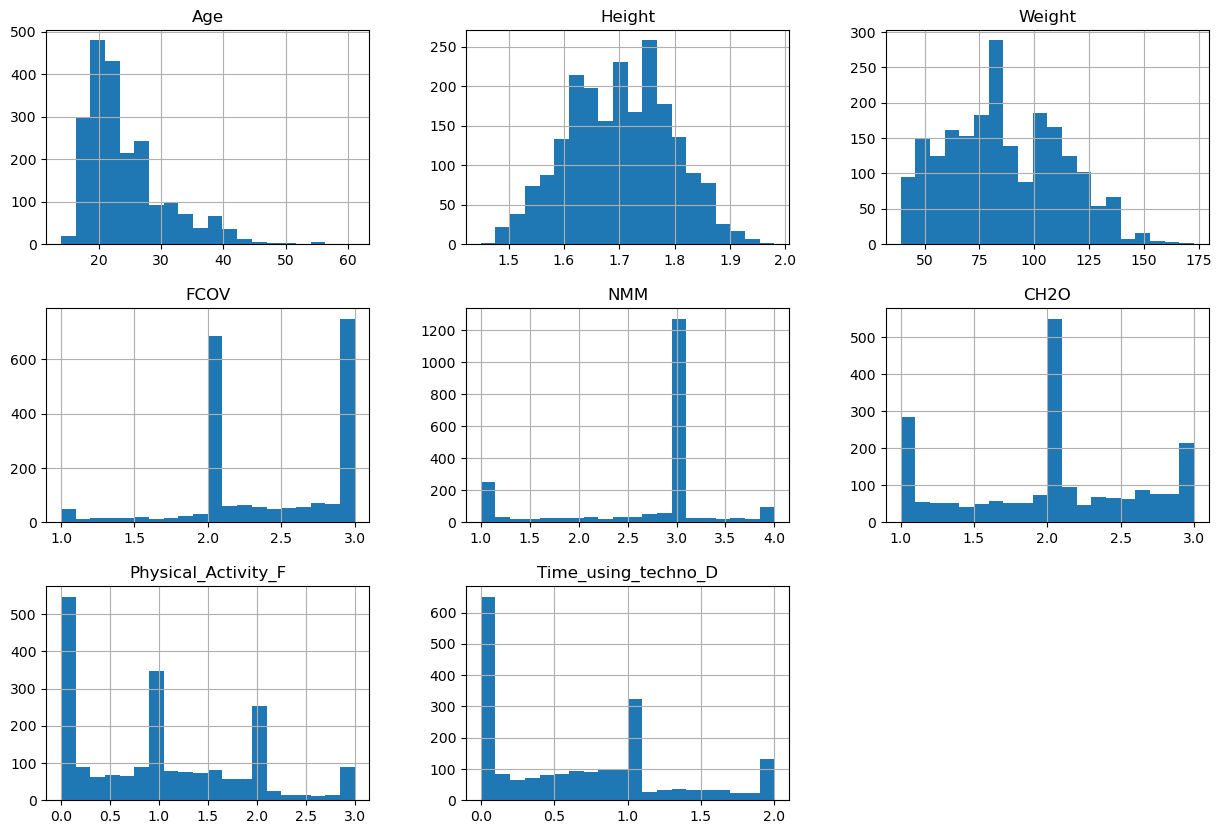

In [169]:
#Plotting histogram
data.hist(figsize=(15,10), bins=20)
plt.show()

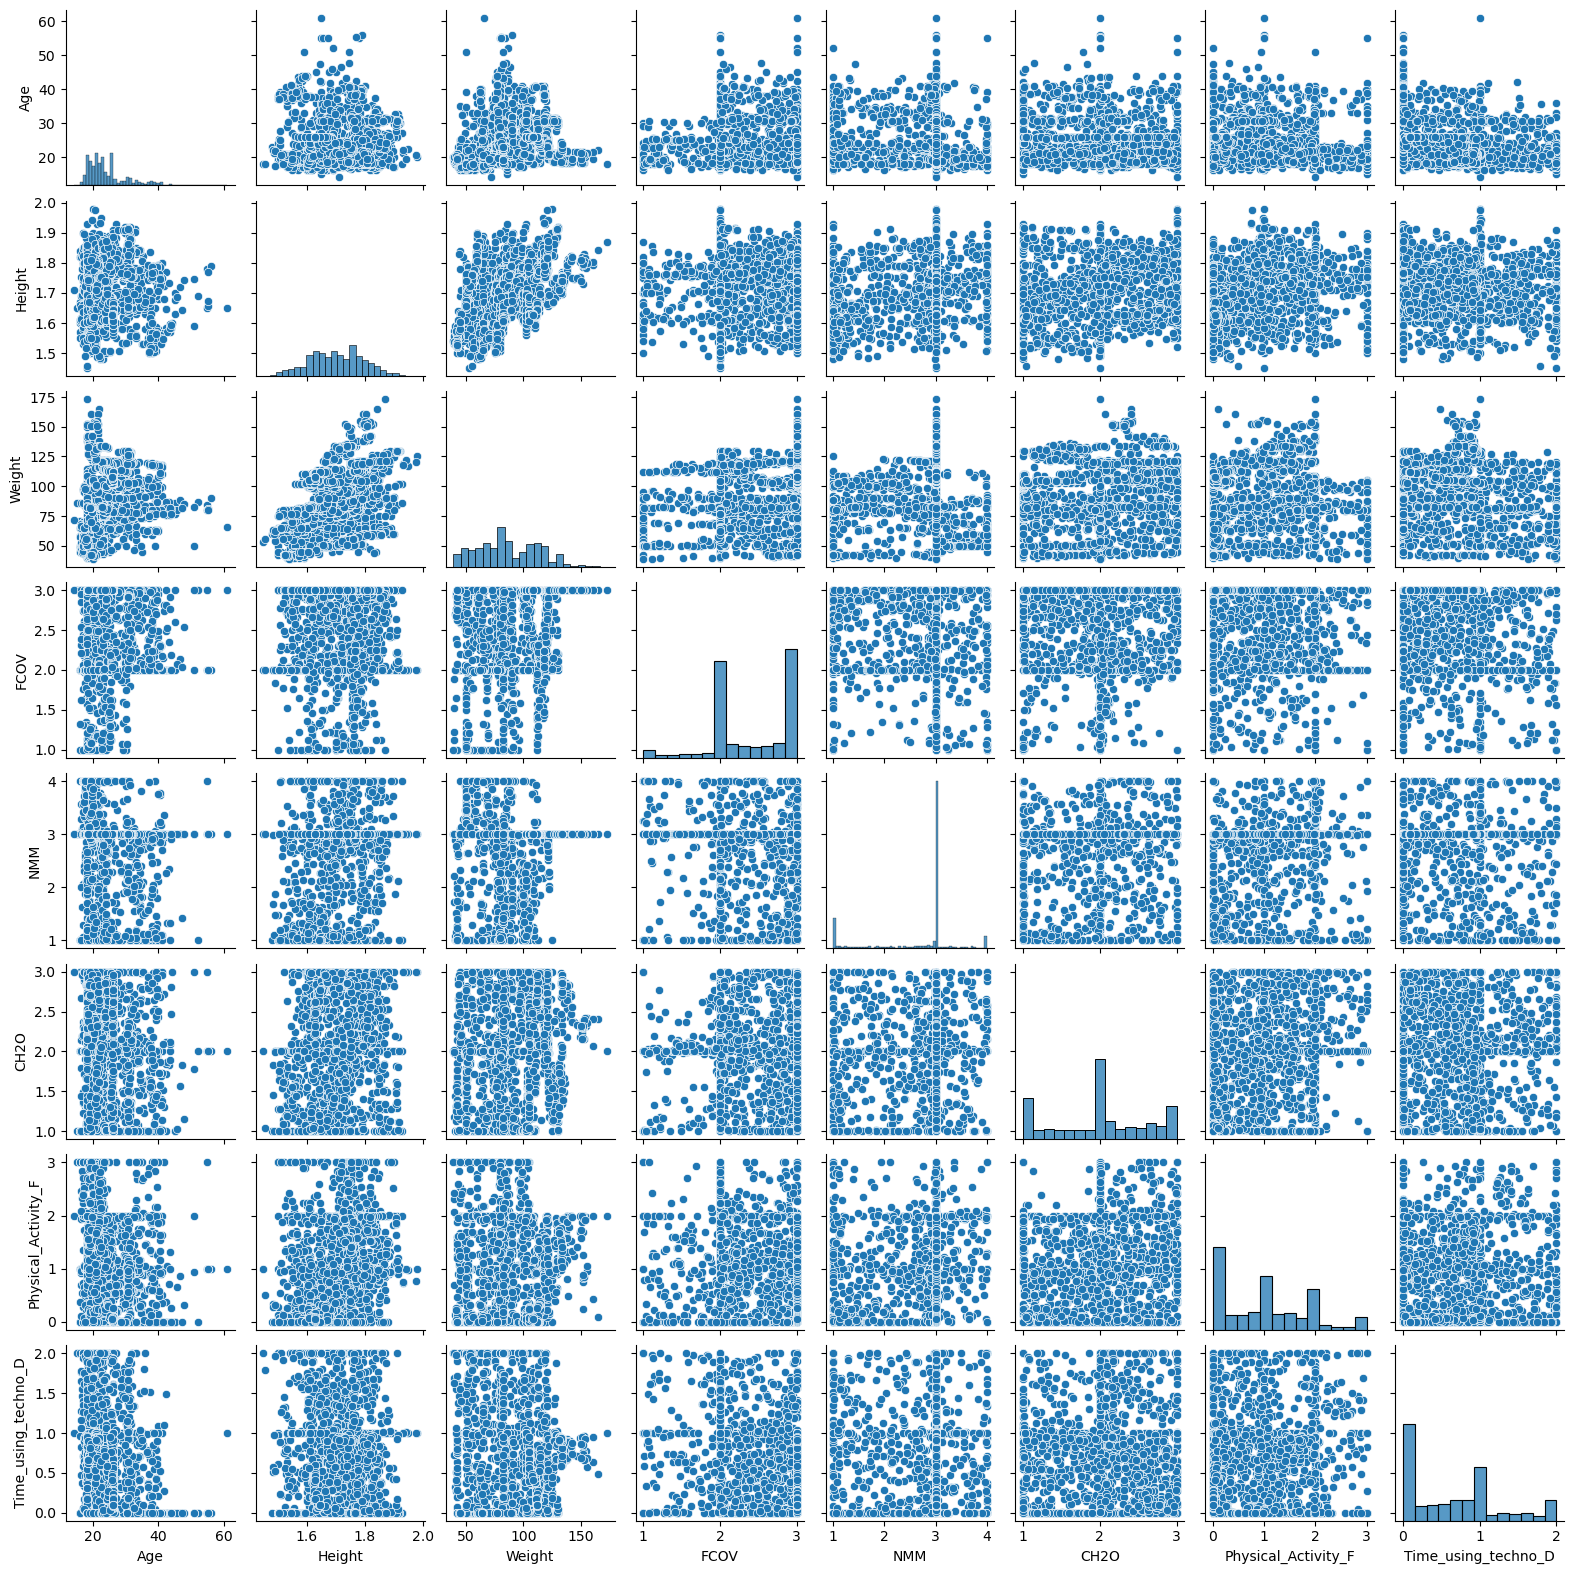

In [72]:
#Pairwise relationship in a dataset
sns.pairplot(data, height=2)
plt.show()

In [171]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                          Age    Height    Weight      FCOV       NMM  \
Age                  1.000000 -0.025958  0.202560  0.016291 -0.043944   
Height              -0.025958  1.000000  0.463136 -0.038121  0.243672   
Weight               0.202560  0.463136  1.000000  0.216125  0.107469   
FCOV                 0.016291 -0.038121  0.216125  1.000000  0.042216   
NMM                 -0.043944  0.243672  0.107469  0.042216  1.000000   
CH2O                -0.045304  0.213376  0.200575  0.068461  0.057088   
Physical_Activity_F -0.144938  0.294709 -0.051436  0.019939  0.129504   
Time_using_techno_D -0.296931  0.051912 -0.071561 -0.101135  0.036326   

                         CH2O  Physical_Activity_F  Time_using_techno_D  
Age                 -0.045304            -0.144938            -0.296931  
Height               0.213376             0.294709             0.051912  
Weight               0.200575            -0.051436            -0.071561  
FCOV                 0.068461             0.01

In [177]:
#Pairwise correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

Age    Height    Weight      FCOV       NMM  \
Age                  1.000000 -0.025958  0.202560  0.016291 -0.043944   
Height              -0.025958  1.000000  0.463136 -0.038121  0.243672   
Weight               0.202560  0.463136  1.000000  0.216125  0.107469   
FCOV                 0.016291 -0.038121  0.216125  1.000000  0.042216   
NMM                 -0.043944  0.243672  0.107469  0.042216  1.000000   
CH2O                -0.045304  0.213376  0.200575  0.068461  0.057088   
Physical_Activity_F -0.144938  0.294709 -0.051436  0.019939  0.129504   
Time_using_techno_D -0.296931  0.051912 -0.071561 -0.101135  0.036326   

                         CH2O  Physical_Activity_F  Time_using_techno_D  
Age                 -0.045304            -0.144938            -0.296931  
Height               0.213376             0.294709             0.051912  
Weight               0.200575            -0.051436            -0.071561  
FCOV                 0.068461             0.019939            -0.101135  
NMM                  0.057088             0.129504             0.036326  
CH2O                 1.000000             0.167236             0.011965  
Physical_Activity_F  0.167236             1.000000             0.058562  
Time_using_techno_D  0.011965             0.058562             1.000000

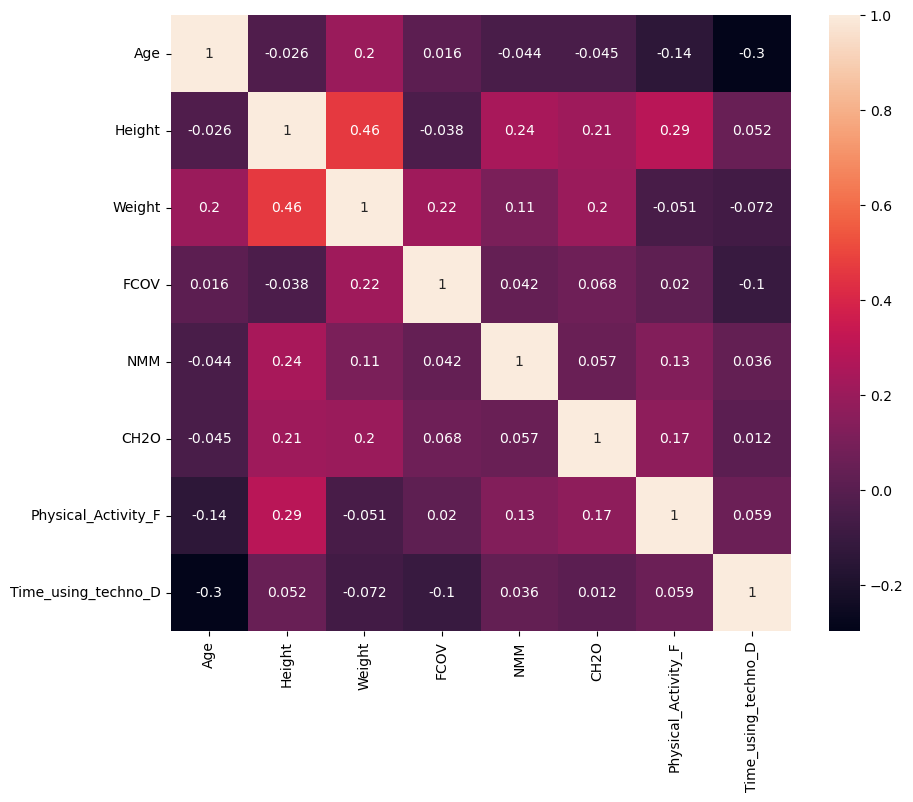

In [179]:
#Heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [187]:
print(numeric_data.columns)

Index(['Age', 'Height', 'Weight', 'FCOV', 'NMM', 'CH2O', 'Physical_Activity_F',
       'Time_using_techno_D'],
      dtype='object')


In [189]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight',
       'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O',
       'Calorie_Consump_Monitoring', 'Physical_Activity_F',
       'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity'],
      dtype='object')


In [195]:
#Checking for nor available values
data.isna().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight    False
FCOHCF                            False
FCOV                              False
NMM                               False
COFBM                             False
Smoke                             False
CH2O                              False
Calorie_Consump_Monitoring        False
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                   False
MTRANS                            False
NObesity                          False
dtype: bool

In [197]:
#checking for null values
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
Family_history_with_overweight    0
FCOHCF                            0
FCOV                              0
NMM                               0
COFBM                             0
Smoke                             0
CH2O                              0
Calorie_Consump_Monitoring        0
Physical_Activity_F               0
Time_using_techno_D               0
Consumption_Alc                   0
MTRANS                            0
NObesity                          0
dtype: int64

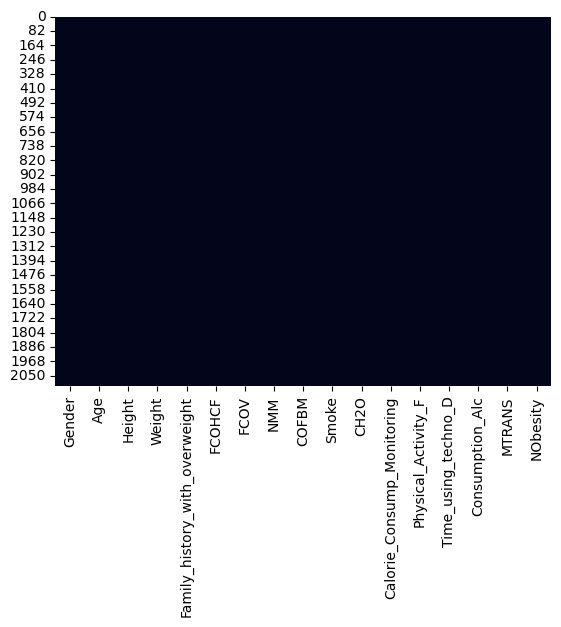

In [199]:
#Heatmap of null values
sns.heatmap(data.isnull(), cbar=False)
plt.show()

Dataset does not contain any null values.

## Cross Tabulation
##### Genderwise preference of mode of transportation

In [201]:
pd.crosstab(data['MTRANS'], data['Gender'])

Gender                 Female  Male
MTRANS                             
Automobile                166   291
Bike                        0     7
Motorbike                   2     9
Public_Transportation     854   726
Walking                    21    35

##### Consumption of alcohol based on gender

In [208]:
pd.crosstab(data['Consumption_Alc'], data['Gender'])

Gender           Female  Male
Consumption_Alc              
Always                0     1
Frequently           28    42
Sometimes           711   690
no                  304   335

##### Consumption of food between meals

In [210]:
pd.crosstab(data['COFBM'], data['Gender'])

Gender      Female  Male
COFBM                   
Always          23    30
Frequently     161    81
Sometimes      844   921
no              15    36

##### Obesity status based on gender

In [212]:
pd.crosstab(data['NObesity'], data['Gender'])

Gender               Female  Male
NObesity                         
Insufficient_Weight     173    99
Normal_Weight           141   146
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

##### Scatterplot of how obesity varies with physical activity and age

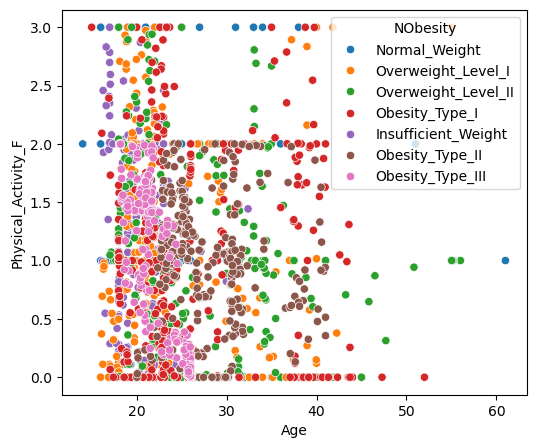

In [214]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Age', y='Physical_Activity_F', data=data, hue= 'NObesity')
plt.show()

##### Variation of obesity according to Weight and Age

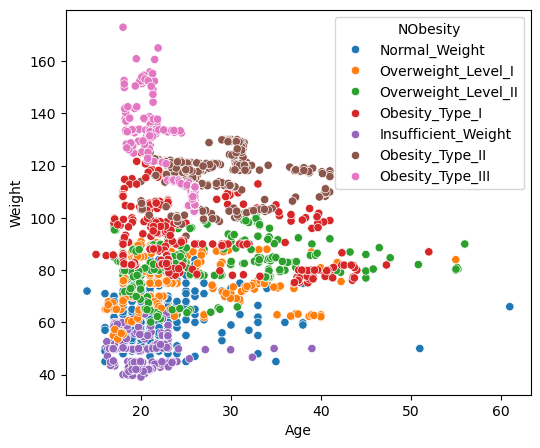

In [216]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Weight', data=data, hue= 'NObesity')
plt.show()

##### Variation of obesity according to Weight and Height

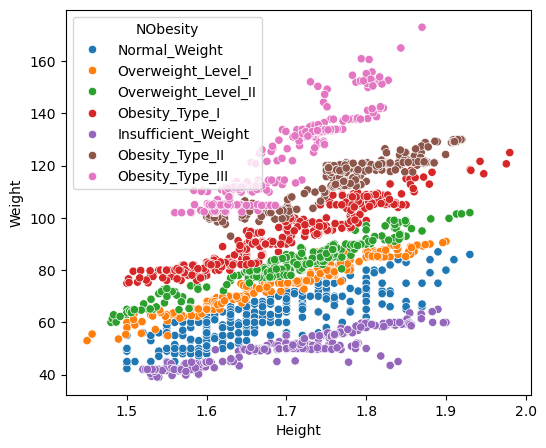

In [221]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Height', y='Weight', data=data, hue='NObesity')
plt.show()

## Preprocessing

### Handling missing values

In [225]:
#check if there are any missing or null values left
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Gender, Age, Height, Weight, Family_history_with_overweight, FCOHCF, FCOV, NMM, COFBM, Smoke, CH2O, Calorie_Consump_Monitoring, Physical_Activity_F, Time_using_techno_D, Consumption_Alc, MTRANS, NObesity]
Index: []

In [227]:
#Drop missing values - Check
data.dropna(inplace=True)

In [229]:
#Check for any remaining duplicates calues
data.duplicated().any()

True

In [231]:
#Dropping duplicates if any
data.drop_duplicates(inplace=True)

In [233]:
data.shape

(2087, 17)

### Handling Outliers

In [244]:
for cols in data.columns:
    if data[cols].dtype == object : # Selecting only numerical column
        continue
    else:
        Q1 = data[cols].quantile(q=0.25)
        Q3 = data[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)          
        high = Q3 + 1.5*(Q3-Q1)
        data.loc[(data[cols]<low) | (data[cols]>high),cols] = data[cols].median()   # Replacing outliers with median
        

Replace outliers with median values of that column

## Feature Scaling

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[data.select_dtypes(include=['int','float']).columns] = scaler.fit_transform(data[data.select_dtypes(include=['int','float']).columns])  # Selecting only numerical features
data.head()

Gender       Age    Height    Weight Family_history_with_overweight FCOHCF  \
0  Female -0.473866 -0.887864 -0.873605                            yes     no   
1  Female -0.473866 -1.963531 -1.179922                            yes     no   
2    Male  0.007852  1.048338 -0.375838                            yes     no   
3    Male  0.971287  1.048338  0.007059                             no     no   
4    Male -0.233007  0.833204  0.114270                             no     no   

       FCOV       NMM      COFBM Smoke      CH2O Calorie_Consump_Monitoring  \
0 -0.788364  0.183899  Sometimes    no -0.007810                         no   
1  1.082164  0.183899  Sometimes   yes  1.636552                        yes   
2 -0.788364  0.183899  Sometimes    no -0.007810                         no   
3  1.082164  0.183899  Sometimes    no -0.007810                         no   
4 -0.788364  0.183899  Sometimes    no -0.007810                         no   

   Physical_Activity_F  Time_using_techno_D Consumption_Alc  \
0            -1.186977             0.554211              no   
1             2.328908            -1.090505       Sometimes   
2             1.156947             0.554211      Frequently   
3             1.156947            -1.090505      Frequently   
4            -1.186977            -1.090505       Sometimes   

                  MTRANS             NObesity  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [249]:
#Using scatterplot to understand what changes has been made
scaled = pd.DataFrame(data[data.select_dtypes(include=['int', 'float']).columns])
scaled.columns = list(data.select_dtypes(include=['int', 'float']).columns)

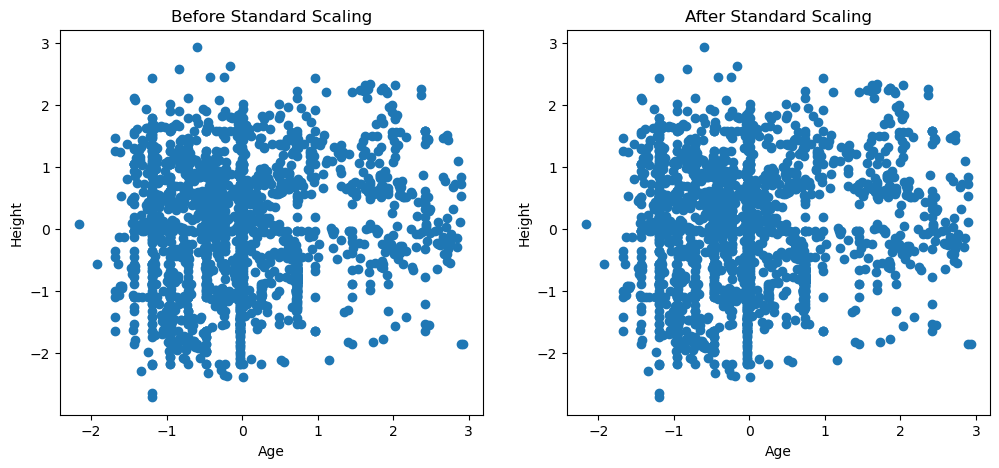

In [251]:
# scatterplot of before scaling and after scaling data
# taking age and weight column as example.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(data.Age, data.Height)
ax1.set_title('Before Standard Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Height')

ax2.scatter(scaled.Age, scaled.Height)
ax2.set_title('After Standard Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Height');


## Categorical Features

In [256]:
data.dtypes=='object'

Gender                             True
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight     True
FCOHCF                             True
FCOV                              False
NMM                               False
COFBM                              True
Smoke                              True
CH2O                              False
Calorie_Consump_Monitoring         True
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                    True
MTRANS                             True
NObesity                           True
dtype: bool

In [264]:
data['Gender'], c=pd.factorize(data['Gender'])
data['Family_history_with_overweight'], c=pd.factorize(data['Family_history_with_overweight'])
data['FCOHCF'], c=pd.factorize(data['FCOHCF'])
data['Smoke'], c=pd.factorize(data['Smoke'])
data['Calorie_Consump_Monitoring'], c=pd.factorize(data['Calorie_Consump_Monitoring'])

In [266]:
def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis=1)
    data.drop([x], axis=1, inplace=True)
    return data

In [268]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['NObesity'] = le.fit_transform(data['NObesity'])
data['COFBM'] = le.fit_transform(data['COFBM'])
data['Consumption_Alc'] = le.fit_transform(data['Consumption_Alc'])
data['MTRANS'] = le.fit_transform(data['MTRANS'])

In [270]:
data['NObesity']

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObesity, Length: 2087, dtype: int32

In [272]:
data.tail()

Gender       Age    Height    Weight  Family_history_with_overweight  \
2106       0 -0.479444  0.088089  1.707448                               0   
2107       0 -0.237116  0.495273  1.796832                               0   
2108       0 -0.106788  0.534233  1.794780                               0   
2109       0  0.335886  0.397021  1.781658                               0   
2110       0  0.167953  0.390417  1.786482                               0   

      FCOHCF      FCOV       NMM  COFBM  Smoke      CH2O  \
2106       1  1.082164  0.183899      2      0 -0.454848   
2107       1  1.082164  0.183899      2      0  0.000626   
2108       1  1.082164  0.183899      2      0  0.081303   
2109       1  1.082164  0.183899      2      0  1.393744   
2110       1  1.082164  0.183899      2      0  1.412118   

      Calorie_Consump_Monitoring  Physical_Activity_F  Time_using_techno_D  \
2106                           0             0.777546             0.400014   
2107                           0             0.385081            -0.104876   
2108                           0             0.470422            -0.027545   
2109                           0             0.148013            -0.126644   
2110                           0             0.015986             0.084048   

      Consumption_Alc  MTRANS  NObesity  
2106                2       3         4  
2107                2       3         4  
2108                2       3         4  
2109                2       3         4  
2110                2       3         4

## Train Test Split

In [333]:
#divide datafram into X and Y
# x -> Independent Features
# y -> Target Feature

X = data.iloc[:, :-1]
y = data['NObesity']

### Assumption Check

In [335]:
# Imposting scipy for statistical functions
from scipy import stats

In [337]:
# Skewness of data
print('The skewness of data is :-\n', stats.skew(X))

The skewness of data is :-
 [-0.01629187  0.81520832 -0.03329851  0.23137158  1.7116574  -2.39170569
 -0.44787879 -2.86901571 -2.09262877  6.66733494 -0.10625321  4.33448963
  0.49396513  0.60878693  0.22469951 -1.26600866]


In [339]:
# Kurtosis of data
print('The kurtosis of data is :-\n', stats.kurtosis(X))

The kurtosis of data is :-
 [-1.99973458  0.23664082 -0.57462875 -0.73792304  0.92977105  3.72025611
 -0.62491844 13.5013899   5.78057282 42.45335514 -0.86441793 16.78780031
 -0.63930715 -0.55515889 -0.33812161 -0.23060541]


In [341]:
# Checking outliers using z-score
z_score = np.abs(stats.zscore(X))
data[(z_score > 3).all(axis=1)]

Empty DataFrame
Columns: [Gender, Age, Height, Weight, Family_history_with_overweight, FCOHCF, FCOV, NMM, COFBM, Smoke, CH2O, Calorie_Consump_Monitoring, Physical_Activity_F, Time_using_techno_D, Consumption_Alc, MTRANS, NObesity]
Index: []

In [304]:
z_score

Gender       Age    Height    Weight  Family_history_with_overweight  \
0     1.008179  0.473866  0.887864  0.873605                        0.460394   
1     1.008179  0.473866  1.963531  1.179922                        0.460394   
2     0.991887  0.007852  1.048338  0.375838                        0.460394   
3     0.991887  0.971287  1.048338  0.007059                        2.172052   
4     0.991887  0.233007  0.833204  0.114270                        2.172052   
...        ...       ...       ...       ...                             ...   
2106  1.008179  0.479444  0.088089  1.707448                        0.460394   
2107  1.008179  0.237116  0.495273  1.796832                        0.460394   
2108  1.008179  0.106788  0.534233  1.794780                        0.460394   
2109  1.008179  0.335886  0.397021  1.781658                        0.460394   
2110  1.008179  0.167953  0.390417  1.786482                        0.460394   

        FCOHCF      FCOV       NMM     COFBM     Smoke      CH2O  \
0     2.754719  0.788364  0.183899  0.318128  0.146755  0.007810   
1     2.754719  1.082164  0.183899  0.318128  6.814090  1.636552   
2     2.754719  0.788364  0.183899  0.318128  0.146755  0.007810   
3     2.754719  1.082164  0.183899  0.318128  0.146755  0.007810   
4     2.754719  0.788364  0.183899  0.318128  0.146755  0.007810   
...        ...       ...       ...       ...       ...       ...   
2106  0.363013  1.082164  0.183899  0.318128  0.146755  0.454848   
2107  0.363013  1.082164  0.183899  0.318128  0.146755  0.000626   
2108  0.363013  1.082164  0.183899  0.318128  0.146755  0.081303   
2109  0.363013  1.082164  0.183899  0.318128  0.146755  1.393744   
2110  0.363013  1.082164  0.183899  0.318128  0.146755  1.412118   

      Calorie_Consump_Monitoring  Physical_Activity_F  Time_using_techno_D  \
0                       0.219584             1.186977             0.554211   
1                       4.554073             2.328908             1.090505   
2                       0.219584             1.156947             0.554211   
3                       0.219584             1.156947             1.090505   
4                       0.219584             1.186977             1.090505   
...                          ...                  ...                  ...   
2106                    0.219584             0.777546             0.400014   
2107                    0.219584             0.385081             0.104876   
2108                    0.219584             0.470422             0.027545   
2109                    0.219584             0.148013             0.126644   
2110                    0.219584             0.015986             0.084048   

      Consumption_Alc    MTRANS  
0            1.411836  0.506768  
1            0.522834  0.506768  
2            2.457503  0.506768  
3            2.457503  1.297220  
4            0.522834  0.506768  
...               ...       ...  
2106         0.522834  0.506768  
2107         0.522834  0.506768  
2108         0.522834  0.506768  
2109         0.522834  0.506768  
2110         0.522834  0.506768  

[2087 rows x 16 columns]

In [343]:
# Creating datafrmae of skewness and kurtosis
norm_data = pd.DataFrame()
norm_data['Attributes'] = X.columns
norm_data['Skewness'] = stats.skew(X)
norm_data['Kurtosis'] = stats.kurtosis(X)

In [310]:
norm_data

Attributes  Skewness   Kurtosis
0                           Gender -0.016292  -1.999735
1                              Age  0.815208   0.236641
2                           Height -0.033299  -0.574629
3                           Weight  0.231372  -0.737923
4   Family_history_with_overweight  1.711657   0.929771
5                           FCOHCF -2.391706   3.720256
6                             FCOV -0.447879  -0.624918
7                              NMM -2.869016  13.501390
8                            COFBM -2.092629   5.780573
9                            Smoke  6.667335  42.453355
10                            CH2O -0.106253  -0.864418
11      Calorie_Consump_Monitoring  4.334490  16.787800
12             Physical_Activity_F  0.493965  -0.639307
13             Time_using_techno_D  0.608787  -0.555159
14                 Consumption_Alc  0.224700  -0.338122
15                          MTRANS -1.266009  -0.230605

## Feature Selection

In [345]:
#performing feature selection using decision tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(X, y)

In [347]:
#Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

Features  feature_importances_
3                           Weight              0.469596
2                           Height              0.219399
0                           Gender              0.161894
1                              Age              0.044067
14                 Consumption_Alc              0.025655
5                           FCOHCF              0.019895
6                             FCOV              0.018863
8                            COFBM              0.011928
15                          MTRANS              0.005441
13             Time_using_techno_D              0.005397
10                            CH2O              0.005275
12             Physical_Activity_F              0.004509
9                            Smoke              0.003264
7                              NMM              0.002960
4   Family_history_with_overweight              0.001858
11      Calorie_Consump_Monitoring              0.000000

In [349]:
# Selecting only imp features
l = ['Weight','Height','Gender','Age','Consumption_Alc','FCOHCF','FCOV','COFBM','Physical_Activity_F','MTRANS','CH2O','Time_using_techno_D','Smoke']
scaled_x = X[l]

In [351]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size=0.2, random_state=40)

In [325]:
print('Shape of train_X is',train_X.shape)
print('Shape of train_y is',train_y.shape)
print('Shape of test_X is',test_X.shape)
print('Shape of test_y is',test_y.shape)

Shape of train_X is (1669, 13)
Shape of train_y is (1669,)
Shape of test_X is (418, 13)
Shape of test_y is (418,)


## Model Implementation

### Model 1 - Logistic Regression

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [355]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [359]:
# Creating a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y) #Fitting the model

LogisticRegression()

In [362]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logistic_model.score(train_X, train_y))
print('Testing score is:- %0.2f' %logistic_model.score(test_X, test_y))

Training score is:- 0.87
Testing score is:- 0.89


In [364]:
#predicting the model
pred_logistic = logistic_model.predict(test_X)

In [368]:
# Determining accuracy of model using confusion matrix
result_logistic = confusion_matrix(test_y, pred_logistic)
result_logistic

array([[47,  0,  0,  0,  0,  0,  0],
       [ 6, 49,  0,  0,  0,  2,  1],
       [ 0,  0, 70,  6,  1,  0,  1],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  0,  0,  0,  0, 37, 12],
       [ 0,  0,  8,  0,  0,  9, 48]], dtype=int64)

In [370]:
#Accuracy using accuracy_score
logistic_model_accuracy = accuracy_score(test_y, pred_logistic)
print('Logistic_model_accuracy: %0.2f' % logistic_model_accuracy)

Logistic_model_accuracy: 0.89


In [372]:
logistic_model_CR = classification_report(test_y, pred_logistic)
print(logistic_model_CR)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.84      0.92        58
           2       0.90      0.90      0.90        78
           3       0.91      1.00      0.95        59
           4       0.98      1.00      0.99        62
           5       0.77      0.76      0.76        49
           6       0.77      0.74      0.76        65

    accuracy                           0.89       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.89      0.89      0.89       418



### Model 2 - Decision Tree

In [377]:
#Creating decision tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)

In [379]:
#Training the model
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4)

In [381]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % dt_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % dt_model.score(test_X, test_y)) 

Training score is:- 0.78
Testing score is:- 0.77


In [385]:
#Predicting the model
pred_dt = dt_model.predict(test_X)

In [387]:
result_dt = confusion_matrix(test_y, pred_dt)
result_dt

array([[42,  5,  0,  0,  0,  0,  0],
       [ 6, 32,  0,  0,  0, 16,  4],
       [ 0,  0, 47, 12,  0,  2, 17],
       [ 0,  0,  3, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  4,  0,  0,  0, 29, 16],
       [ 0,  0,  3,  0,  0,  7, 55]], dtype=int64)

In [393]:
# Accuracy using accuracy_score
dt_model_accuracy = accuracy_score(test_y, pred_dt)
print('dt_model_accuracy:- %0.2f' % dt_model_accuracy)

dt_model_accuracy:- 0.77


In [395]:
dt_model_CR = classification_report(test_y, pred_dt)
print(dt_model_CR)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.78      0.55      0.65        58
           2       0.89      0.60      0.72        78
           3       0.82      0.95      0.88        59
           4       1.00      1.00      1.00        62
           5       0.54      0.59      0.56        49
           6       0.60      0.85      0.70        65

    accuracy                           0.77       418
   macro avg       0.79      0.78      0.77       418
weighted avg       0.79      0.77      0.77       418



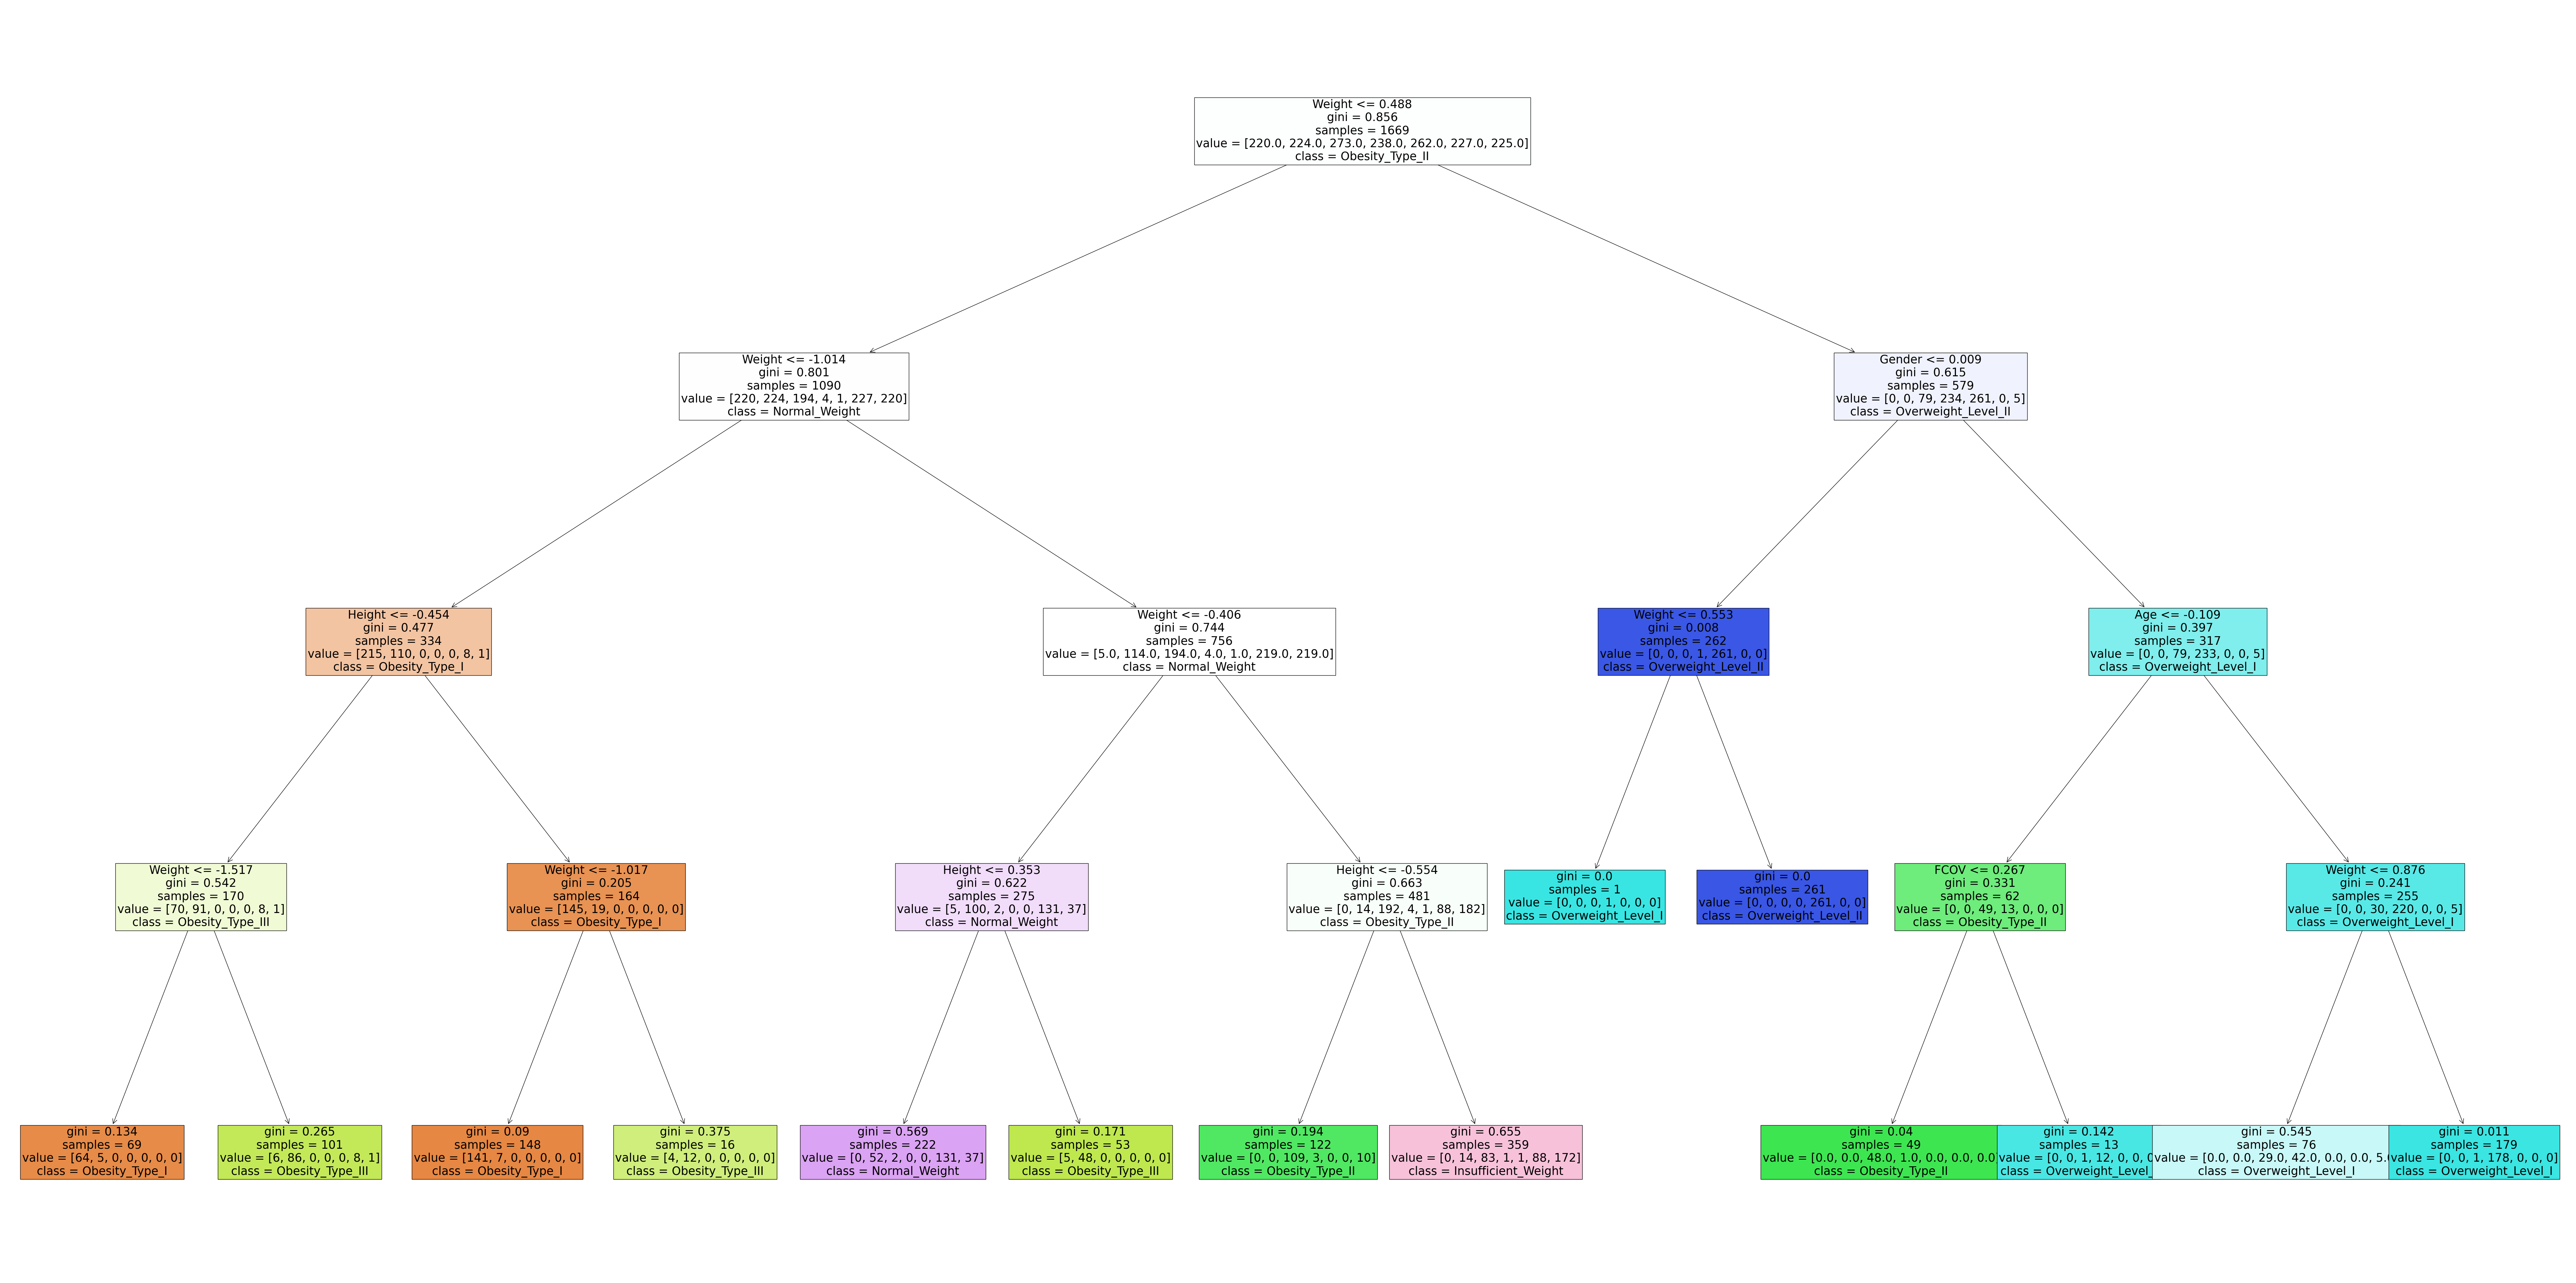

In [416]:
from sklearn import tree
from IPython.display import Image
from IPython.display import display

fig = plt.figure(figsize=(100,50))
names = scaled_x.columns
class1 = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']

_ = tree.plot_tree(dt_model, 
                   feature_names=names,  
                   class_names=class1,
                   impurity=True,
                   filled=True,
                   fontsize=25)
fig.savefig("decision_tree.png")  # Saving the tree as an image file

### Model 3 - Support Vector Classification

In [419]:
from sklearn.svm import SVC

In [421]:
#creating the model
svc_model = SVC()
svc_model.fit(train_X, train_y)

SVC()

In [423]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % svc_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % svc_model.score(test_X, test_y)) 

Training score is:- 0.94
Testing score is:- 0.91


In [425]:
# Predicting the model 
pred_svc = svc_model.predict(test_X)

In [427]:
# Determining accuracy of model using confusion matrix
result_svc = confusion_matrix(test_y, pred_svc)
result_svc

array([[44,  3,  0,  0,  0,  0,  0],
       [ 2, 50,  0,  0,  0,  4,  2],
       [ 0,  2, 75,  0,  0,  0,  1],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  3,  0,  0,  0, 42,  4],
       [ 0,  4,  4,  1,  0,  9, 47]], dtype=int64)

In [429]:
# Accuracy using accuracy_score
svc_model_accuracy = accuracy_score(test_y, pred_svc)
print('dt_model_accuracy:-%0.2f' % svc_model_accuracy)

dt_model_accuracy:-0.91


In [431]:
svc_model_CR = classification_report(test_y, pred_svc)
print(svc_model_CR)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.81      0.86      0.83        58
           2       0.95      0.96      0.96        78
           3       0.98      1.00      0.99        59
           4       1.00      1.00      1.00        62
           5       0.76      0.86      0.81        49
           6       0.87      0.72      0.79        65

    accuracy                           0.91       418
   macro avg       0.90      0.91      0.90       418
weighted avg       0.91      0.91      0.91       418



### Model 4 - KNN

In [434]:
from sklearn.neighbors import KNeighborsClassifier

In [436]:
knn_accuracy_list = []                                    # store accuracy in list
for k in range(40):
    k = k+1
    knn_model = KNeighborsClassifier(n_neighbors= k)      # creating the model
    knn_model.fit(train_X, train_y)                       # fitting the model 
    pred_knn = knn_model.predict(test_X)                  # make prediction on test dataset
    knn_acc_score = accuracy_score(test_y, pred_knn)      
    knn_accuracy_list.append(knn_acc_score)

In [438]:
print('The maximum accuracy using KNN model is : %0.2f' %max(knn_accuracy_list))

The maximum accuracy using KNN model is : 0.82


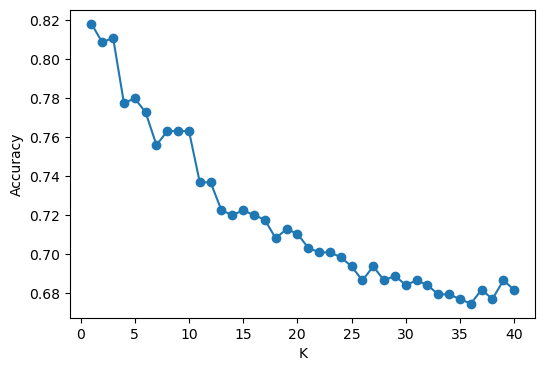

In [440]:
# Plotting accuracy vs k neigbhor
plt.figure(1,figsize=(6,4))
plt.plot(list(range(1,41)), knn_accuracy_list, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

- In above plot we can see untill k = 14 there is sudden drop in accuracy but after k = 14 accuracy is stabalizing.
- we will take k=14

In [443]:
knn_model = KNeighborsClassifier(n_neighbors= 14)      
knn_model.fit(train_X, train_y)                      
pred_knn = knn_model.predict(test_X)

In [445]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % knn_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % knn_model.score(test_X, test_y)) 

Training score is:- 0.78
Testing score is:- 0.72


In [449]:
# Accuracy using accuracy_score
knn_model_accuracy = accuracy_score(test_y, pred_knn)
print('dt_model_accuracy:-%0.2f' % knn_model_accuracy)

dt_model_accuracy:-0.72


In [451]:
# Determining accuracy of model using confusion matrix
result_knn = confusion_matrix(test_y, pred_knn)
result_knn

array([[42,  3,  0,  0,  0,  1,  1],
       [13, 17, 10,  2,  0,  7,  9],
       [ 2,  1, 58,  7,  1,  4,  5],
       [ 0,  0,  0, 58,  0,  1,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 1,  3,  7,  3,  0, 31,  4],
       [ 2,  2,  8,  9,  0, 11, 33]], dtype=int64)

In [453]:
knn_model_CR = classification_report(test_y, pred_knn)
print(knn_model_CR)

              precision    recall  f1-score   support

           0       0.70      0.89      0.79        47
           1       0.65      0.29      0.40        58
           2       0.70      0.74      0.72        78
           3       0.73      0.98      0.84        59
           4       0.98      1.00      0.99        62
           5       0.56      0.63      0.60        49
           6       0.63      0.51      0.56        65

    accuracy                           0.72       418
   macro avg       0.71      0.72      0.70       418
weighted avg       0.71      0.72      0.70       418



### Model 5 - Random Forest

In [456]:
from sklearn.ensemble import RandomForestClassifier

In [458]:
# Creating the model
rf_model = RandomForestClassifier()
# Training the model
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [460]:
# Predicting the model 
pred_rf = rf_model.predict(test_X)

In [462]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_model.score(test_X, test_y)) 

Training score is:- 1.00
Testing score is:- 0.97


In [464]:
# Determining accuracy of model using confusion matrix
result_rf = confusion_matrix(test_y, pred_rf)
result_rf

array([[47,  0,  0,  0,  0,  0,  0],
       [ 2, 54,  0,  0,  0,  1,  1],
       [ 0,  1, 75,  0,  0,  0,  2],
       [ 0,  0,  1, 58,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  2,  0,  0,  0, 47,  0],
       [ 0,  0,  1,  0,  0,  1, 63]], dtype=int64)

In [466]:
print('The accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_rf))

The accuracy of the model is :-0.97


In [468]:
# Classification report
rf_model_CR = classification_report(test_y, pred_rf)
print(rf_model_CR)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.95      0.93      0.94        58
           2       0.97      0.96      0.97        78
           3       1.00      0.98      0.99        59
           4       1.00      1.00      1.00        62
           5       0.96      0.96      0.96        49
           6       0.95      0.97      0.96        65

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



## HYPERTUNING

##### Hypertuning- Logistic Regression

In [557]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [561]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [563]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [565]:
# Initialize the logistic regression model
logreg = LogisticRegression()

In [567]:
# Define parameter grid
param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [100, 500, 1000]}
]

In [569]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

In [571]:
# Fit the model
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'max_iter': [100, 500, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy', verbose=1)

In [572]:
# Output best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validated Accuracy: 0.9430921939903977


In [575]:
print(grid_search_logreg.best_params_)
print(grid_search_logreg.best_estimator_)

{'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
LogisticRegression(C=0.001, penalty='none', solver='newton-cg')


In [585]:
logreg_hyper_model = LogisticRegression(penalty=None, solver='newton-cg')
logreg_hyper_model = logreg_hyper_model.fit(X_train_scaled, y_train)

In [589]:
# Determining the score of train and test datasets
print('Training score is: {:.2f}'.format(logreg_hyper_model.score(X_train_scaled, y_train)))
print('Testing score is: {:.2f}'.format(logreg_hyper_model.score(X_test_scaled, y_test)))

Training score is: 0.98
Testing score is: 0.96


In [591]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_logreg_hyper_model))

The final accuracy of the model is :-0.16


In [595]:
# Determining accuracy of model using confusion matrix
result_logreg_hyper_model = confusion_matrix(test_y, pred_logreg_hyper_model)
result_logreg_hyper_model

array([[ 5,  6, 11,  7,  8,  5,  5],
       [ 8,  9,  8,  6,  7,  9, 11],
       [11, 11, 12, 12, 10, 12, 10],
       [10,  9, 10, 11,  6,  6,  7],
       [11,  5, 11, 12, 12,  6,  5],
       [ 6, 10,  9,  8,  4,  7,  5],
       [ 8, 11,  7, 10, 13,  7,  9]], dtype=int64)

In [597]:
# Make predictions
pred_logreg_hyper_model = logreg_hyper_model.predict(X_test_scaled)

In [599]:
# Evaluate the model
accuracy = accuracy_score(y_test, pred_logreg_hyper_model)
print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, pred_logreg_hyper_model))

Test Set Accuracy: 0.9641148325358851
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.97      0.97      0.97        61
           2       0.99      0.96      0.97        70
           3       0.95      0.98      0.97        64
           4       1.00      1.00      1.00        60
           5       0.96      0.91      0.93        55
           6       0.90      0.96      0.93        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



#### Hypertuning - Random Forest

In [602]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 40) # specifying cross- validator

tuned_paramaters = [{'criterion':['gini','entropy'],             # Giving hyper parameters to tune
                     'max_depth':list(range(4,8)), 
                     'min_samples_split':list(range(2,5)),
                     'min_samples_leaf':list(range(1,5)),
                     'max_features':['sqrt','log2',None]}]

rf = RandomForestClassifier()                                  
grid_search_rf = GridSearchCV(rf,
                          param_grid=tuned_paramaters, 
                          cv=folds,
                          scoring='accuracy',
                          verbose=1)

grid_search_rf.fit(train_X, train_y)      

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy', verbose=1)

In [604]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       min_samples_leaf=2)


In [606]:
# Creating model on hypertuned parameters
rf_hyper_model= RandomForestClassifier(criterion='entropy', 
                                       max_depth=7, 
                                       max_features=None,
                                       min_samples_split=3,)

rf_hyper_model = rf_hyper_model.fit(train_X,train_y)
pred_rf_hyper_model = rf_hyper_model.predict(test_X)

In [608]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_hyper_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_hyper_model.score(test_X, test_y)) 

Training score is:- 0.99
Testing score is:- 0.96


In [610]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_rf_hyper_model))

The final accuracy of the model is :-0.96


In [612]:
# Determining accuracy of model using confusion matrix
result_rf_hyper_model = confusion_matrix(test_y, pred_rf_hyper_model)
result_rf_hyper_model

array([[47,  0,  0,  0,  0,  0,  0],
       [ 2, 54,  0,  0,  0,  2,  0],
       [ 0,  0, 77,  0,  0,  1,  0],
       [ 0,  0,  3, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  2,  0,  0,  0, 44,  3],
       [ 0,  0,  2,  0,  0,  1, 62]], dtype=int64)

In [614]:
# Classification report
rf_hyper_model_CR = classification_report(test_y, pred_rf_hyper_model)
print(rf_hyper_model_CR)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.96      0.93      0.95        58
           2       0.94      0.99      0.96        78
           3       1.00      0.95      0.97        59
           4       1.00      1.00      1.00        62
           5       0.92      0.90      0.91        49
           6       0.95      0.95      0.95        65

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



### ROC-AUC

In [701]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [703]:
# Scale the training and testing data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [705]:
train_y_roc = label_binarize(train_y, classes=[0,1,2,3,4,5,6])
num_classes = train_y_roc.shape[1]
test_y_roc = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6])
num_classes

7

In [707]:
# Using OneVsRestClassifier with LogisticRegression
classifier = OneVsRestClassifier(LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000))
classifier.fit(train_X_scaled, train_y_roc)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [709]:
# Predict probabilities for ROC
y_score = classifier.predict_proba(test_X_scaled)

In [711]:
# Initialize dictionaries for False Positive Rate, True Positive Rate, and AUC
fpr = {}
tpr = {}
roc_auc = {}

In [713]:
y_score.shape

(418, 7)

In [715]:
test_y_roc.shape

(418, 7)

In [723]:
# Compute ROC curve and ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [727]:
# Print ROC AUC for each class
for i in range(num_classes):
    print(f"Class {i} - AUC: {roc_auc[i]:.2f}")

Class 0 - AUC: 1.00
Class 1 - AUC: 0.91
Class 2 - AUC: 0.79
Class 3 - AUC: 1.00
Class 4 - AUC: 1.00
Class 5 - AUC: 0.79
Class 6 - AUC: 0.75


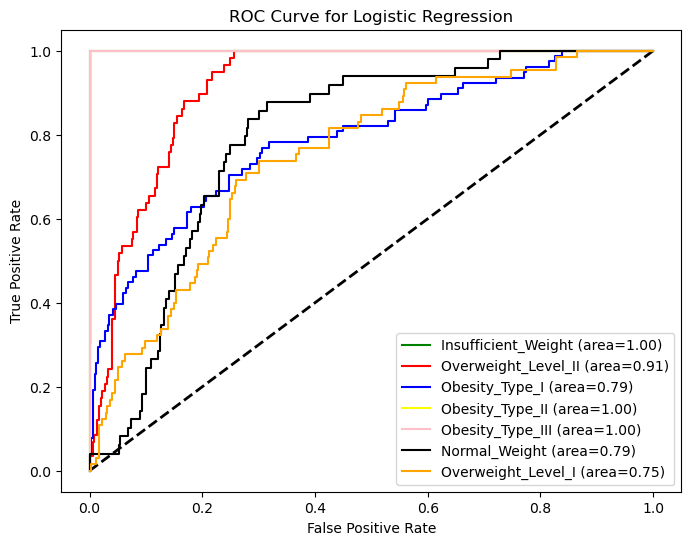

In [729]:
import matplotlib.pyplot as plt

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing

# Add ROC curves for each class
colors = ['green', 'red', 'blue', 'yellow', 'pink', 'black', 'orange']
class_labels = [
    'Insufficient_Weight', 'Overweight_Level_II', 'Obesity_Type_I',
    'Obesity_Type_II', 'Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_I'
]

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'{class_labels[i]} (area={roc_auc[i]:0.2f})')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [739]:
import pandas as pd

# Creating dataframe with consistent lengths for all columns
result_metrics = pd.DataFrame({
    'Model': [
        'model_1 (Logistic Regression)',
        'model_2 (Decision Tree)',
        'model_3 (Support Vector Machines)',
        'model_4 (K Nearest Neighbors)',
        'model_5 (Random Forest)'
    ],
    'train accuracy': [0.87, 0.78, 0.94, 0.78, 1.00],
    'test accuracy': [0.89, 0.77, 0.91, 0.72, 0.97],
    'Accuracy': [0.89, 0.77, 0.91, 0.72, 0.97],
    'Accuracy_after_hypertuning': [0.96, 'NA', 'NA', 'NA', 0.96]
})

# Displaying the result
print(result_metrics)

                               Model  train accuracy  test accuracy  Accuracy  \
0      model_1 (Logistic Regression)            0.87           0.89      0.89   
1            model_2 (Decision Tree)            0.78           0.77      0.77   
2  model_3 (Support Vector Machines)            0.94           0.91      0.91   
3      model_4 (K Nearest Neighbors)            0.78           0.72      0.72   
4            model_5 (Random Forest)            1.00           0.97      0.97   

  Accuracy_after_hypertuning  
0                       0.96  
1                         NA  
2                         NA  
3                         NA  
4                       0.96  


In [741]:
result_metrics

Model  train accuracy  test accuracy  Accuracy  \
0      model_1 (Logistic Regression)            0.87           0.89      0.89   
1            model_2 (Decision Tree)            0.78           0.77      0.77   
2  model_3 (Support Vector Machines)            0.94           0.91      0.91   
3      model_4 (K Nearest Neighbors)            0.78           0.72      0.72   
4            model_5 (Random Forest)            1.00           0.97      0.97   

  Accuracy_after_hypertuning  
0                       0.96  
1                         NA  
2                         NA  
3                         NA  
4                       0.96

Before performing hypertuning only Logistic Regression, Decision Tree and Support Vector Machine has given generelized model.

Before hyper tuning model 1's accuracy was 0.89 same goes up to 0.96 after hyper tuning.

As mentioned in above dataframe model_1 i.e. Logistic Regression is winner, It performed better in predicting target variables.

From the above ROC curve of Logistic Regression we can say that model performs better in predicting values of Obesity_Type_II and Obesity_Type_III.

In this project Logistic regression model performed very well with accuracy of 97%.